In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt   # 시각화 도와주는 패키지
import json   as j 

# 
import seaborn as sns 
import folium as f

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [2]:
def aryInfo(ary) : 
    print('type - ' , type(ary)) 
    print('shape - ' , ary.shape)
    print('ndim  - ' , ary.ndim)
    print('dtype - ' , ary.dtype)
    print()
    print('data  -')
    print(ary) 

def seriesInfo(s) :
    print('type   - ' , type(s)) 
    print('index  - ' , s.index) 
    print('values - ' , s.values)
    print('dtype  - ' , s.dtype)
    print()
    print('data  -')
    print(s) 

def frmInfo(frm) : 
    print('type    - ' , type(frm))
    print('shape   - ' , frm.shape)
    print('ndim    - ' , frm.ndim)
    print('row idx - ' , frm.index , type(frm.index))
    print('col idx - ' , frm.columns , type(frm.columns))
    print('values  - ' , type(frm.values))
    print(frm.values)
    print('data - ')
    display(frm)

In [3]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')  

In [220]:
mpgFrm = pd.read_excel('../../data/mpg_visualization.xlsx', index_col = 0 )
mpgFrm.head()
# index_col : 첫 번째 열(인덱스 0)을 데이터프레임의 인덱스로 설정

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpgFrm.columns

Index(['Unnamed: 0', 'manufacturer', 'model', 'displ', 'year', 'cyl', 'trans',
       'drv', 'cty', 'hwy', 'fl', 'class'],
      dtype='object')

In [10]:
# mpgFrm['fl'].unique()    # 연료타입 확인
# mpgFrm['trans'].unique()    # 자동, 수동 타입 확인
# mpgFrm['cyl'].unique()  # 기통 확인(실린더)
mpgFrm.shape      # 행 / 열 개수?


(234, 12)

In [13]:
mpgFrm.describe()   # 정보 확인
mpgFrm.info()   # object -> 질적자료 (분포표 만듦)  ※ 양적자료 : object 제외한 나머지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


양적 자료(데이터)
- 요약 정보의 집계가 되는 컬럼으로, 관측된 값 = 수치 형태의 속성을 가짐
- box plot

질적 자료(데이터)
- 범주 또는 순서 형태의 속성을 가진 자료로, 데이터의 분포를 확인해야 하는 값들
- bar plot


In [223]:
print('양적자료만 추출하여 서브셋 구축')
subset = mpgFrm.loc[ : , ['displ', 'cyl', 'cty','hwy'] ]
# subset

양적자료만 추출하여 서브셋 구축


<Axes: >

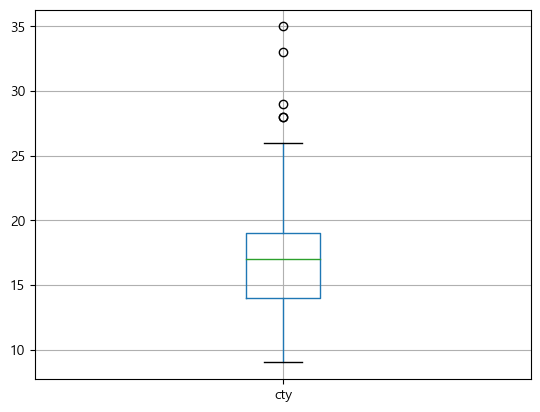

In [224]:
subset.boxplot(['cty'])
# 3,1사분위 사이의 값 = IQR
# 선 위로 나간 동그라미 = 이상치


In [27]:
print('질적자료 - 분포 value_counts() ')
print('제조사의 분포를 확인하고 싶다 - ')
mpgFrm['manufacturer'].value_counts()   # =>bar_chart 만들 수 있음


질적자료 - 분포 value_counts() 
제조사의 분포를 확인하고 싶다 - 


dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

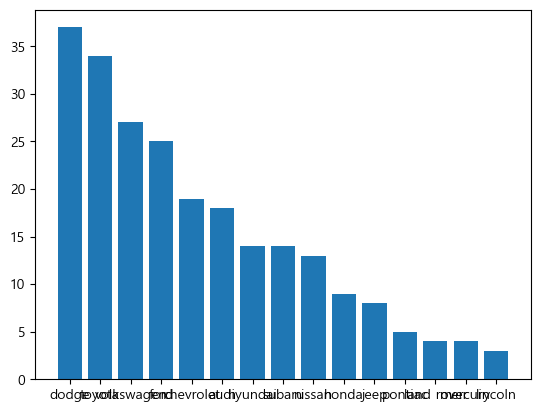

In [28]:
# 시각화
plt.figure()

# 분포 확인
plt.bar(mpgFrm['manufacturer'].value_counts().index,
        mpgFrm['manufacturer'].value_counts().values)

plt.show()
plt.close()

In [225]:
print('Q1) 배기량(displ)에 따른 고속연비를 확인하고자 한다')
print(' 배기량 4 이하인 자동차와 5 이상인 자동차 중 고속도로 평균 연비가 높은 지를 확인')
print(mpgFrm[mpgFrm['displ'] <= 4]['hwy'].mean())
print(mpgFrm[mpgFrm['displ'] >= 5 ]['hwy'].mean())

Q1) 배기량(displ)에 따른 고속연비를 확인하고자 한다
 배기량 4 이하인 자동차와 5 이상인 자동차 중 고속도로 평균 연비가 높은 지를 확인
25.96319018404908
18.07894736842105


In [226]:
print('Q2) 자동차 제조사에 따른 도시 연비를 비교하려고 한다')
print('audi, toyota 두 회사의 모든 차종에 대한 도시연비 평균을 비교')
print('audi 도시연비 평균 : ', mpgFrm[mpgFrm['manufacturer'] == 'audi']['cty'].mean())
print('toyota 도시연비 평균 : ', mpgFrm[mpgFrm['manufacturer'] == 'toyota']['cty'].mean())

Q2) 자동차 제조사에 따른 도시 연비를 비교하려고 한다
audi, toyota 두 회사의 모든 차종에 대한 도시연비 평균을 비교
audi 도시연비 평균 :  17.61111111111111
toyota 도시연비 평균 :  18.529411764705884


In [254]:
print('Q3) chevrolet, ford, honda 제조사의 모든 차종에 대한 고속도로 연비 평균을 시각화')
# 각각 구하기
print('chevrolet : ',mpgFrm[mpgFrm['manufacturer'] == 'chevrolet']['cty'].mean())
print('ford : ',mpgFrm[mpgFrm['manufacturer'] == 'ford']['cty'].mean())
print('honda : ',mpgFrm[mpgFrm['manufacturer'] == 'honda']['cty'].mean())

Q3) chevrolet, ford, honda 제조사의 모든 차종에 대한 고속도로 연비 평균을 시각화
chevrolet :  15.0
ford :  14.0
honda :  24.444444444444443


In [78]:
# 같이 구하기
c_idx = (mpgFrm['manufacturer'] == 'chevrolet')
f_idx = (mpgFrm['manufacturer'] == 'ford')
h_idx = (mpgFrm['manufacturer'] == 'honda')

subset = mpgFrm.loc[c_idx | f_idx | h_idx , : ]
# subset['manufacturer'].unique()     # 3개 차종만 출력됨

m_series = subset.groupby('manufacturer')['hwy'].mean()    # key : value 형태 => 시각화


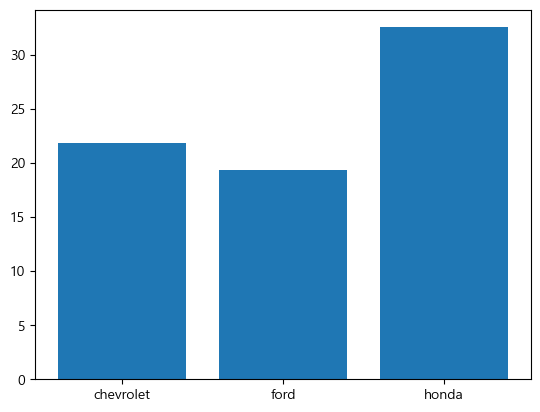

In [79]:
plt.figure()

plt.bar(m_series.index,
        m_series.values)

plt.show()
plt.close()


In [261]:
print('연료가격(price_fl) 파생변수를 추가하려고 한다')
print('c: 가스 2.35 , d : 2.38 , e : 2.11 , p : 3.45 , r : 2.22')
# mpgFrm['fl'].unique()
priceFrm = pd.DataFrame({
    'fl' : ['c','d','e','p','r'],
    'price_fl' : ['2.35 ','2.38 ','2.11 ','3.45 ','2.22']
})
priceFrm

연료가격(price_fl) 파생변수를 추가하려고 한다
c: 가스 2.35 , d : 2.38 , e : 2.11 , p : 3.45 , r : 2.22


,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,3.45
4,r,2.22


In [262]:
# inner join 방식으로 두 프레임 합치기
# on에 들어가는 값은 프레임 내의 key 값과 이름이 일치해야 한다.
mpgFrm = pd.merge(mpgFrm, priceFrm, how='inner', on = 'fl' )

In [259]:
mpgFrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  228 non-null    object 
 1   model         228 non-null    object 
 2   displ         228 non-null    float64
 3   year          228 non-null    float64
 4   cyl           228 non-null    float64
 5   trans         228 non-null    object 
 6   drv           228 non-null    object 
 7   cty           228 non-null    float64
 8   hwy           228 non-null    float64
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  price_fl_x    234 non-null    object 
 12  price_fl_y    234 non-null    object 
dtypes: float64(5), object(8)
memory usage: 33.8+ KB


In [92]:
mpgFrm.isnull().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

In [234]:
mpgFrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  price_fl_x    234 non-null    object 
 12  price_fl_y    234 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 25.6+ KB


In [235]:
mpgFrm.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl_x      0
price_fl_y      0
dtype: int64

In [238]:
# 임의로 결측값 부여하기

mpgFrm.loc[65, 'hwy'] = np.NaN
mpgFrm.loc[12, 'hwy'] = np.NaN
mpgFrm.loc[140, 'hwy'] = np.NaN
mpgFrm.loc[32, 'hwy'] = np.NaN
mpgFrm.loc[167, 'hwy'] = np.NaN
mpgFrm.loc[190, 'hwy'] = np.NaN
mpgFrm.loc[234, 'hwy'] = np.NaN

In [239]:
print('isnull(= isna) - ')
mpgFrm[['drv','hwy']].isna().sum()

isnull(= isna) - 


drv    7
hwy    7
dtype: int64

In [240]:
print('Q3) hwy 결측값을 제외하고 어떤 구동방식의 고속도로평균 연비가 높은지 확인한다면')
print(mpgFrm.groupby('drv')['hwy'].mean())

print('dropna - 결측값 제외 시킴')
print(mpgFrm[['drv', 'hwy']].dropna().groupby('drv').mean())

# 두 결과의 차이가 없음

Q3) hwy 결측값을 제외하고 어떤 구동방식의 고속도로평균 연비가 높은지 확인한다면
drv
4    19.040000
f    28.271845
r    21.000000
Name: hwy, dtype: float64
dropna - 결측값 제외 시킴
           hwy
drv           
4    19.040000
f    28.271845
r    21.000000


구동방식별 고속도로 연비평균을 막대그래프로 시각화


<Figure size 640x480 with 0 Axes>

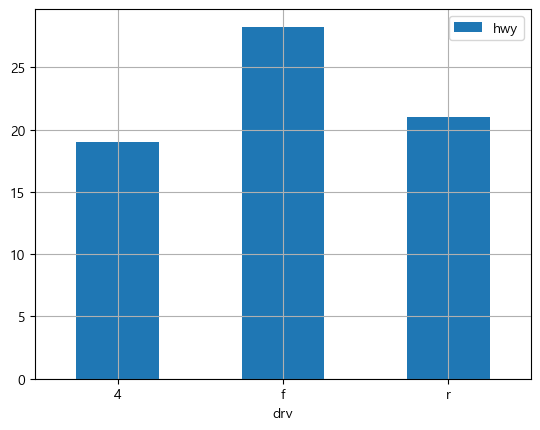

In [242]:
print('구동방식별 고속도로 연비평균을 막대그래프로 시각화')
grpDrvFrm = mpgFrm[['drv', 'hwy']].dropna().groupby('drv').mean()
# grpDrvFrm

plt.figure()

grpDrvFrm.plot(kind = 'bar',
               rot = 0)

plt.grid()
plt.show()
plt.close()

Q4) 구동방식별 고속도로, 도시연비 평균으로 서브셋을 만들고
시각화 - multi bar 


<Figure size 640x480 with 0 Axes>

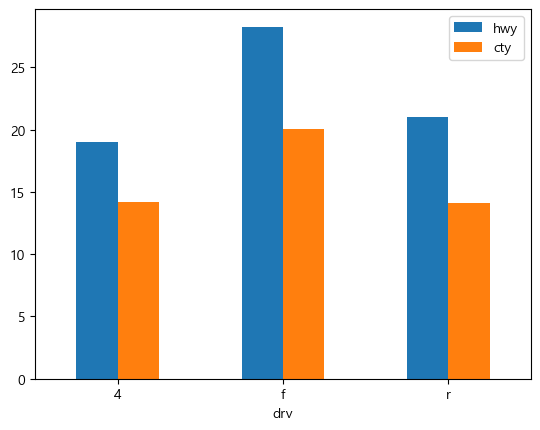

In [133]:
print('Q4) 구동방식별 고속도로, 도시연비 평균으로 서브셋을 만들고')
print('시각화 - multi bar ')
# 구동방식별 고속도로, 도시연비 평균
grpDrvFrm = mpgFrm[['drv', 'hwy' , 'cty']].dropna().groupby('drv').mean()
# subset

# 시각화
plt.figure()

grpDrvFrm.plot(kind = 'bar',
        rot = 0)

plt.show()
plt.close()


Q5) 해당 클래스별 빈도수를 시각화


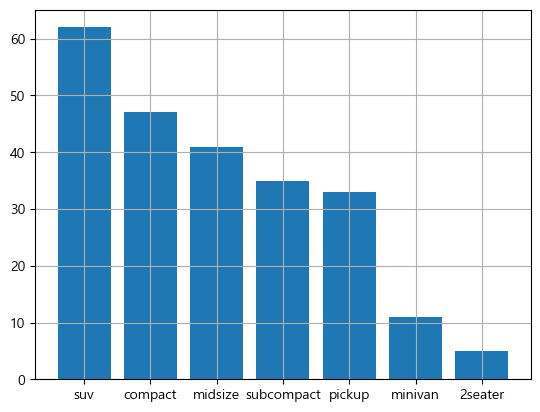

In [139]:
print('Q5) 해당 클래스별 빈도수를 시각화')
# mpgFrm['class'].unique()
# mpgFrm['class'].value_counts()    # series => 빈도수 (index : value)

# 시각화
plt.figure()

plt.bar(mpgFrm['class'].value_counts().index,
        mpgFrm['class'].value_counts().values)
plt.grid()
plt.show()
plt.close()

In [243]:
print('Q6) 제조사별 SUV 도시연비 Top5 시각화')
# mpgFrm['manufacturer'].unique()
# mpgFrm.groupby('manufacturer').groups

# mpgFrm.groupby('manufacturer')['cty'].mean()
subset = mpgFrm[ mpgFrm['class'] == 'suv' ]. groupby('manufacturer')[['cty']].mean()
print('type - ', type(subset))
display(subset)    # => frame
print()
subset.sort_values(by='cty', ascending=False, inplace=True)
display(subset.head())

Q6) 제조사별 SUV 도시연비 Top5 시각화
type -  <class 'pandas.core.frame.DataFrame'>


,cty
manufacturer,
chevrolet,12.666667
dodge,11.857143
ford,12.888889
jeep,13.285714
land rover,11.500000
lincoln,11.333333
mercury,13.250000
nissan,13.750000
subaru,18.833333


,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.285714
mercury,13.250000


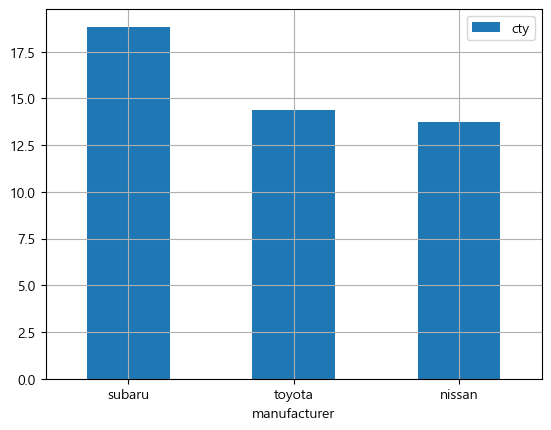

In [244]:
subset.head(3).plot(kind= 'bar', rot = 0)
plt.grid()
plt.show()
plt.close()

이상치 처리

<Axes: >

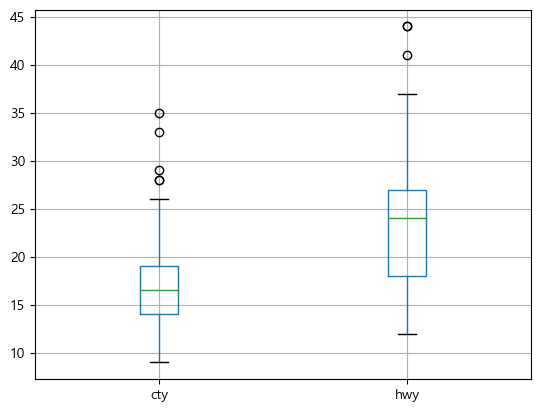

In [173]:
subset = mpgFrm.loc[: , ['cty','hwy']]
# subset
subset.boxplot()

In [180]:
print('IQR')
# 3,4 분위에 대한 정보 + 1,4 분위에 대한 정보 필요
# q = 분위 수
# subset['hwy'].quantile(q =0.25)
Q1 = subset.quantile(q=0.25)
Q1

IQR


cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [181]:
Q3 = subset.quantile(q = 0.75)
Q3

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [182]:
IQR = Q3 - Q1
IQR

cty    5.0
hwy    9.0
dtype: float64

In [183]:
print('lower fence - 최저 한계치')
lower = Q1 - 1.5 * IQR
lower

lower fence - 최저 한계치


cty    6.5
hwy    4.5
dtype: float64

In [184]:
print('upper fence - 최고 한계치')
upper = Q3 + 1.5 * IQR
upper

upper fence - 최고 한계치


cty    26.5
hwy    40.5
dtype: float64

In [185]:
print('lower fence 경계값을 얻어 본다면')
lower_outlier = subset[subset > lower].min()
lower_outlier

lower fence 경계값을 얻어 본다면


cty     9.0
hwy    12.0
dtype: float64

In [187]:
print('upper fence 경계값을 얻어 본다면')
upper_outlier = subset[subset < upper].max()
upper_outlier

upper fence 경계값을 얻어 본다면


cty    26.0
hwy    37.0
dtype: float64

In [190]:
print('cty outlier 확인 - ')
mpgFrm[mpgFrm['cty'] > upper_outlier['cty']]

cty outlier 확인 - 


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
119,100.0,honda,civic,1.6,1999.0,4.0,manual(m5),f,28.0,33.0,r,subcompact,2.22
196,197.0,toyota,corolla,1.8,2008.0,4.0,manual(m5),f,28.0,37.0,r,compact,2.22
230,213.0,volkswagen,jetta,1.9,1999.0,4.0,manual(m5),f,33.0,44.0,d,compact,2.38
231,222.0,volkswagen,new beetle,1.9,1999.0,4.0,manual(m5),f,35.0,44.0,d,subcompact,2.38
232,223.0,volkswagen,new beetle,1.9,1999.0,4.0,auto(l4),f,29.0,41.0,d,subcompact,2.38


In [191]:
print('hwy outlier 확인 - ')
mpgFrm[mpgFrm['hwy'] > upper_outlier['hwy']]

hwy outlier 확인 - 


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
230,213.0,volkswagen,jetta,1.9,1999.0,4.0,manual(m5),f,33.0,44.0,d,compact,2.38
231,222.0,volkswagen,new beetle,1.9,1999.0,4.0,manual(m5),f,35.0,44.0,d,subcompact,2.38
232,223.0,volkswagen,new beetle,1.9,1999.0,4.0,auto(l4),f,29.0,41.0,d,subcompact,2.38


In [245]:
cleanFrm = mpgFrm.copy()
cleanFrm[['cty' , 'hwy']].isna().sum()

cty    7
hwy    7
dtype: int64

In [198]:
print('cty outlier 확인 ')
cty_outlier = mpgFrm[mpgFrm['cty']> upper_outlier['cty']]
for idx in cty_outlier.index :
    cleanFrm.loc[idx, 'cty'] = np.NaN

cty outlier 확인 


In [246]:
print('hwy outlier 확인 ')
hwy_outlier = mpgFrm[mpgFrm['hwy']> upper_outlier['hwy']]
for idx in hwy_outlier.index :
    cleanFrm.loc[idx, 'hwy'] = np.NaN


hwy outlier 확인 


In [247]:
cleanFrm[['cty' , 'hwy']].isna().sum()
# cleanFrm.isnull().sum()

cty     7
hwy    10
dtype: int64

In [248]:
print('Q6) 결측값을 평균으로 대체, cty, hwy')
print('이상치 처리 후 구동방식별 도시, 고속도로 연비 평균을 시각화 - ')

# cleanFrm[cleanFrm['cty'] == np.NaN]['cty'] = cleanFrm.mean()
# cleanFrm[cleanFrm['hwy'] == np.NaN]['cty'] = cleanFrm.mean()
# cleanFrm[['cty','hwy']].isna().sum()
# 특정 컬럼에 대해서만 결측값 처리하는 코드
cleanFrm.loc[cleanFrm['cty'] != cleanFrm['cty'] ,'cty' ]= cleanFrm['cty'].mean()
cleanFrm.loc[cleanFrm['hwy'] != cleanFrm['hwy'] ,'hwy' ]= cleanFrm['hwy'].mean()

Q6) 결측값을 평균으로 대체, cty, hwy
이상치 처리 후 구동방식별 도시, 고속도로 연비 평균을 시각화 - 


In [251]:
# cleanFrm.loc[119 , : ]
cleanFrm[ ['cty','hwy']].isnull().sum()

cty    0
hwy    0
dtype: int64

<Axes: >

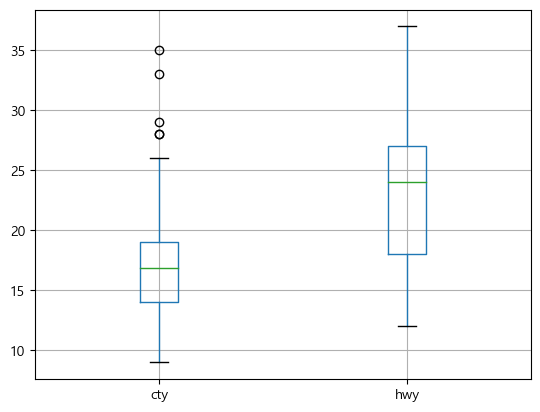

In [252]:
subset = cleanFrm.loc[ :  , ['cty' , 'hwy']]
# subset 
subset.boxplot()

<Figure size 640x480 with 0 Axes>

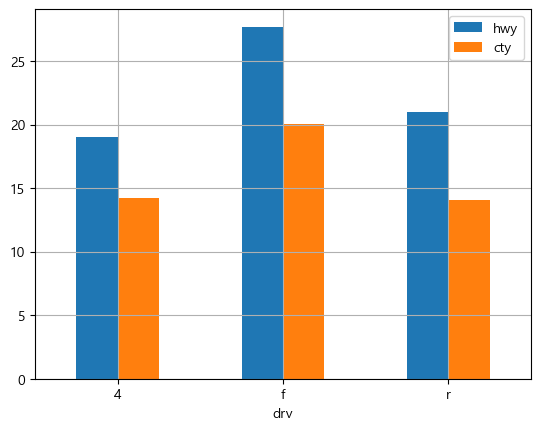

In [253]:
# cleanFrm['drv'].unique()
grpDrvFrm = cleanFrm[['drv' , 'hwy' , 'cty']].groupby('drv').mean()
grpDrvFrm
plt.figure()

grpDrvFrm.plot(kind = 'bar' , 
                rot  = 0)
plt.grid()
plt.show()
plt.close()